## Task III: Retail Analytics - TSF GRIP
### By: J.ZAKARIA
In this project we'll perform Exploratory Data Analysis on the SampleSuperstore US Dataset. The main purpose of our analysis is to find and define the weak areas where we can work to make more profit.

### Assessing the data:
Let's import the dataset, and assess it visually and programmatically.

In [1]:
import pandas as pd

df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [2]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [3]:
df.duplicated().sum()

17

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### Quality issues:
* The data contains 17 duplicated values.
* The postal code should be str and not int.

### Data cleaning:
We'll fix the quality issues in the data.

In [2]:
df.Category = pd.Categorical(df.Category, categories=['Furniture','Office Supplies','Technology'], ordered=True)

In [3]:
# we drop the duplicates
df.drop_duplicates(inplace=True)

In [4]:
df['Postal Code'] = df['Postal Code'].astype(str)

Let's check 

In [5]:
print(f"Number of duplicates: {df.duplicated().sum()}")
df.dtypes

Number of duplicates: 0


Ship Mode         object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Category        category
Sub-Category      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

### Exploratory Data Analysis (EDA):
#### Univariate DataExploration:
In this part we'll explore the nature of the features of our data. First let's check the distribution of our features of the dataset.

/home/user/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(0.0, 300.0)

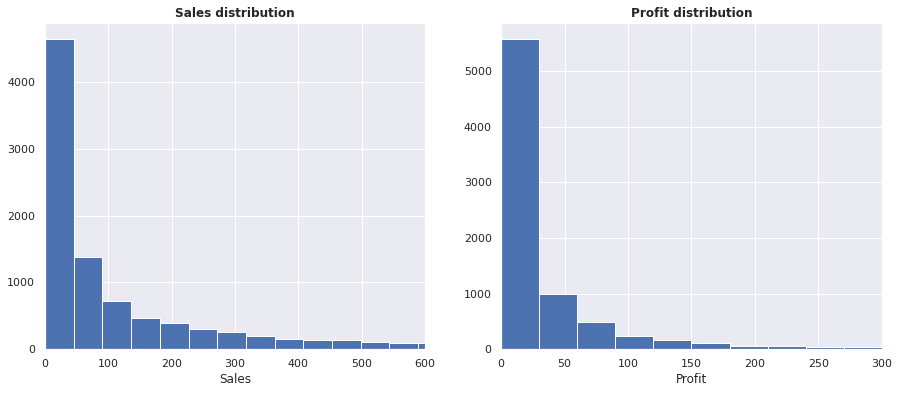

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 6))
sns.set_theme()

plt.subplot(1,2,1)
plt.hist(data=df, x="Sales", bins=500)
plt.title('Sales distribution', fontsize=12, weight="bold")
plt.xlabel('Sales', fontsize=12)
plt.xlim(0,600)

plt.subplot(1,2,2)
plt.hist(data=df, x="Profit", bins=500)
plt.title('Profit distribution', fontsize=12, weight="bold")
plt.xlabel('Profit', fontsize=12)
plt.xlim(0,300)

As we see the distrubution of sales is right skewed so we have many sales with small values in the dataset, the same thing for the Profit. 

Text(0.5, 0, 'Discount')

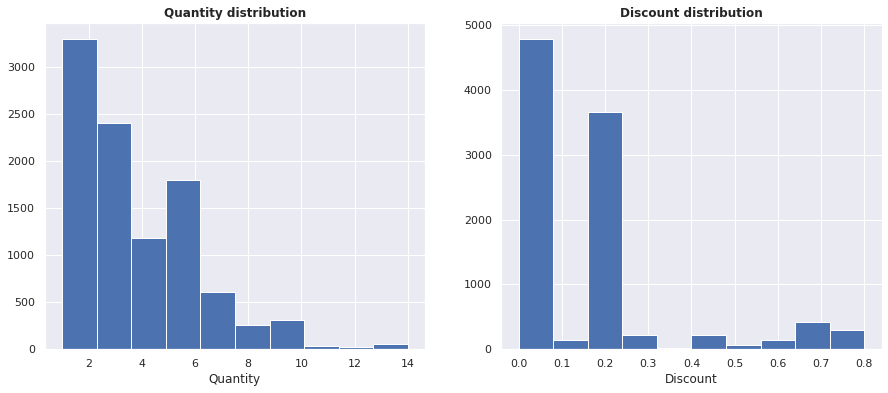

In [11]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
plt.hist(data=df, x="Quantity")
plt.title('Quantity distribution', fontsize=12, weight="bold")
plt.xlabel('Quantity', fontsize=12)

plt.subplot(1,2,2)
plt.hist(data=df, x="Discount")
plt.title('Discount distribution', fontsize=12, weight="bold")
plt.xlabel('Discount', fontsize=12)

The Quantity distribution is right skewed we have many values btween 1 and 6 and few values between 6 an 14, the most common value for the Discount is 20% and 0%. 

Text(0.5, 1.0, 'Segment count')

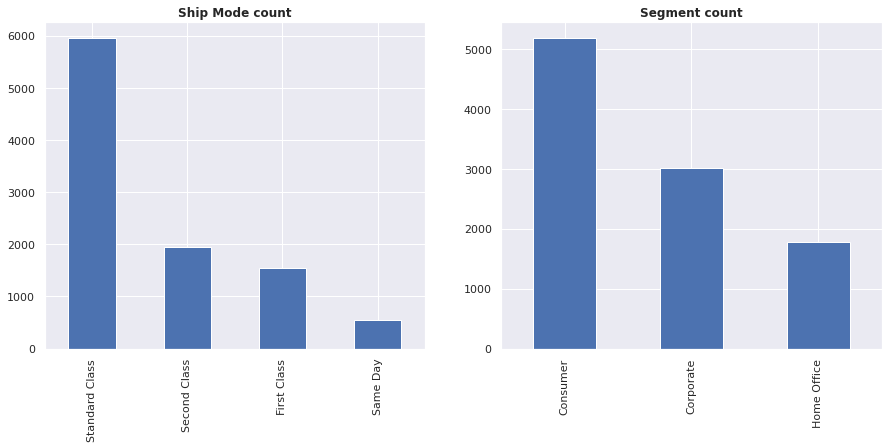

In [12]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
df["Ship Mode"].value_counts().plot(kind='bar')
plt.title('Ship Mode count', fontsize=12, weight="bold")

plt.subplot(1,2,2)
df["Segment"].value_counts().plot(kind='bar')
plt.title('Segment count', fontsize=12, weight="bold")

The class that exist the most in the dataset is the Standar class, and the consumer segment exist the most in the dataset. Same day class and Home office segment doesn't exist alot in the dataset.

Text(0.5, 1.0, 'State count')

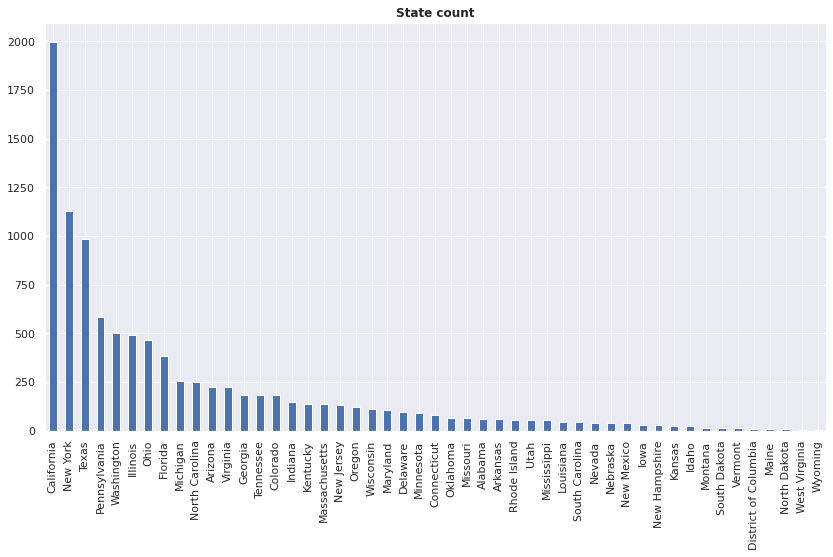

In [13]:
plt.figure(figsize = (14, 7.5))
df["State"].value_counts().plot(kind='bar')
plt.title('State count', fontsize=12, weight="bold")

Our dataset contains the most values from California, New York, and Texas, and the least data in from Wyoming, West Virginia, North Dakota and other states as we see from the figure.

Text(0.5, 1.0, 'Region count')

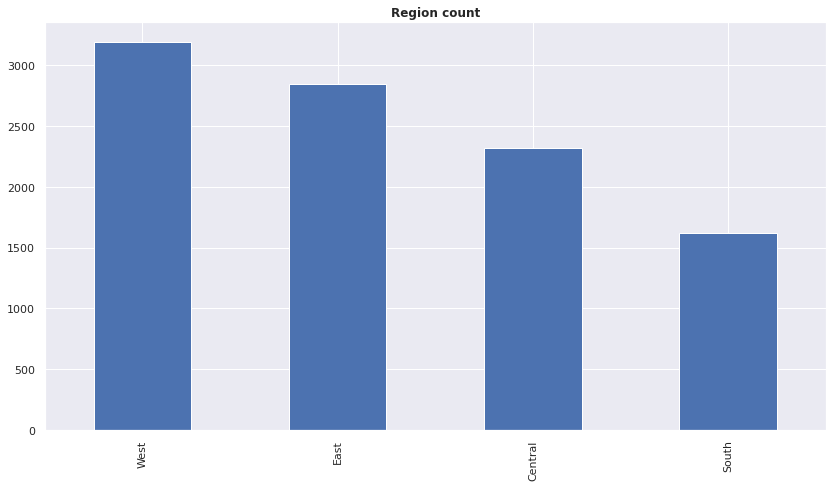

In [14]:
plt.figure(figsize = (14, 7.5))

df["Region"].value_counts().plot(kind='bar')
plt.title('Region count', fontsize=12, weight="bold")

The West and The East Regions exist the most in our dataset, however the South region is the least one.

Text(0.5, 1.0, 'Sub-Category count')

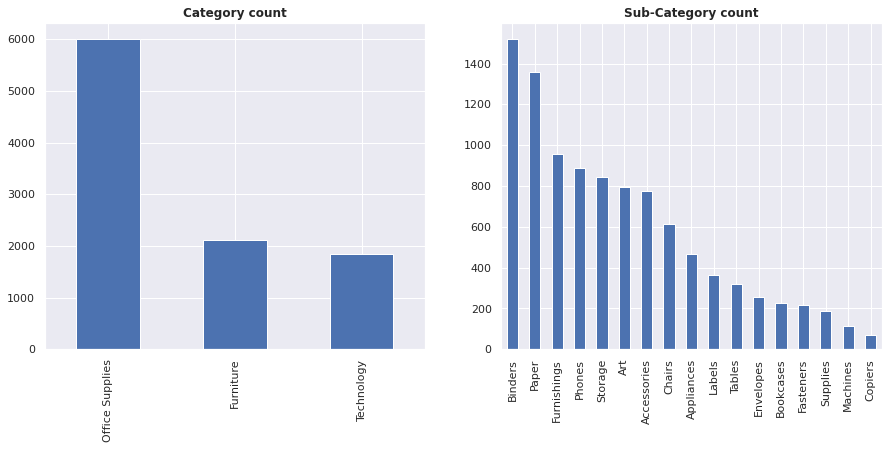

In [15]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
df["Category"].value_counts().plot(kind='bar')
plt.title('Category count', fontsize=12, weight="bold")

plt.subplot(1,2,2)
df["Sub-Category"].value_counts().plot(kind='bar')
plt.title('Sub-Category count', fontsize=12, weight="bold")

The Category that exist the most in the dataset is the Office Supplies Category, and the Blinders, Paper, Furnishiings are the most Sub-Categories in the dataset.

#### Bivariate Data Exploration:
In this part we'll see the correlation matrix and plot the relationship between the features of our data.

In [16]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

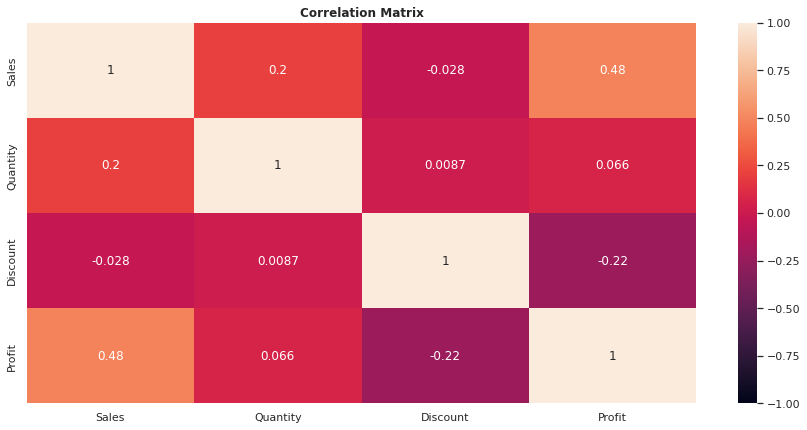

In [17]:
plt.figure(figsize = (15, 7))

sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix', fontsize=12, weight="bold")


There is a medium positive correlation is between Profit & Sales, and a weak negative correlation is between Profit & Discount. Let's plot the relationship between the numerical variables of our data.

Text(0.5, 1.0, 'Profit vs Quantity')

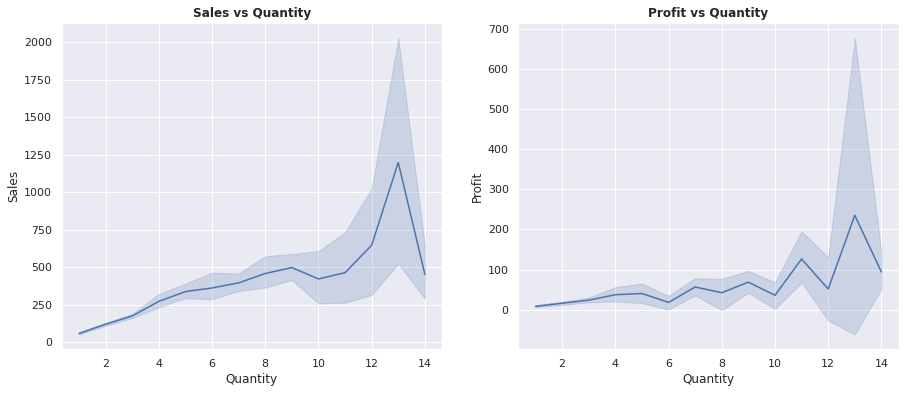

In [18]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
sns.lineplot(data=df, x="Quantity", y="Sales")
plt.title('Sales vs Quantity', fontsize=12, weight="bold")

plt.subplot(1,2,2)
sns.lineplot(data=df, x="Quantity", y="Profit")
plt.title('Profit vs Quantity', fontsize=12, weight="bold")

More Quantity means more Sales especially in the Quantity between 11 to 13, and the same thing for the profit.

Text(0.5, 1.0, 'Profit vs Discount')

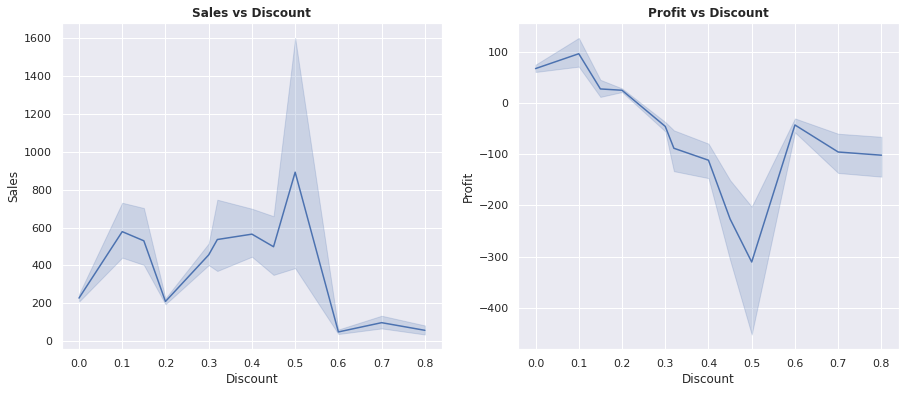

In [19]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
sns.lineplot(data=df, x="Discount", y="Sales")
plt.title('Sales vs Discount', fontsize=12, weight="bold")

plt.subplot(1,2,2)
sns.lineplot(data=df, x="Discount", y="Profit")
plt.title('Profit vs Discount', fontsize=12, weight="bold")

The Discount of 50% can make more sales but less or no profit, the best discount that can make good profit and optimum sales is between 0% to 15%

Text(0.5, 1.0, 'Profit by Class')

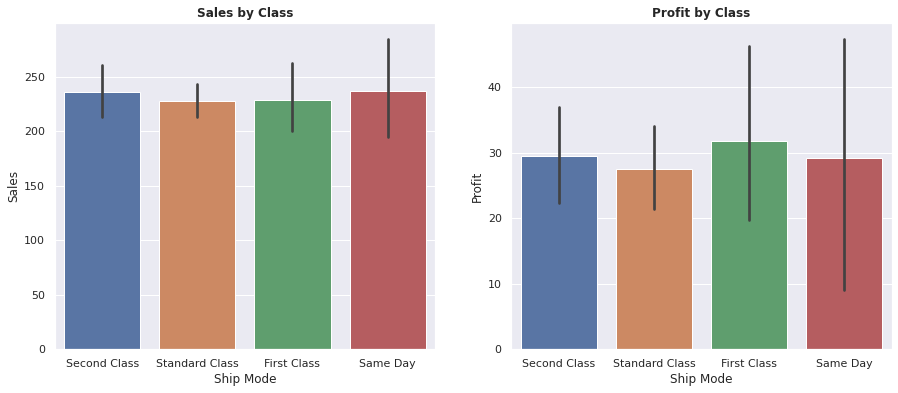

In [20]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
sns.barplot(data=df, x="Ship Mode", y="Sales")
plt.title('Sales by Class', fontsize=12, weight="bold")

plt.subplot(1,2,2)
sns.barplot(data=df, x="Ship Mode", y="Profit")
plt.title('Profit by Class', fontsize=12, weight="bold")

Classes are close in sales but the IC of Same Day class is more larger, in matter of profit the 1st and 2nd classes make more profit but there is no huge difference between them and the other classes, the 1st class and 2nd class have high CI, that means we have outliers there.

Text(0.5, 1.0, 'Profit by Segment')

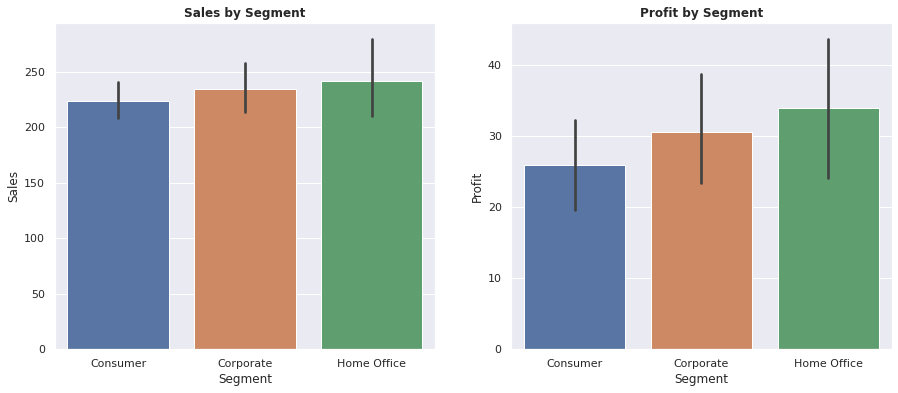

In [21]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
sns.barplot(data=df, x="Segment", y="Sales")
plt.title('Sales by Segment', fontsize=12, weight="bold")

plt.subplot(1,2,2)
sns.barplot(data=df, x="Segment", y="Profit")
plt.title('Profit by Segment', fontsize=12, weight="bold")

In matter of sales they 3 Segements are close but in matter of profit, The Home Office Segement make more profit than the other Segements, the Consumer Segement makes less profit.

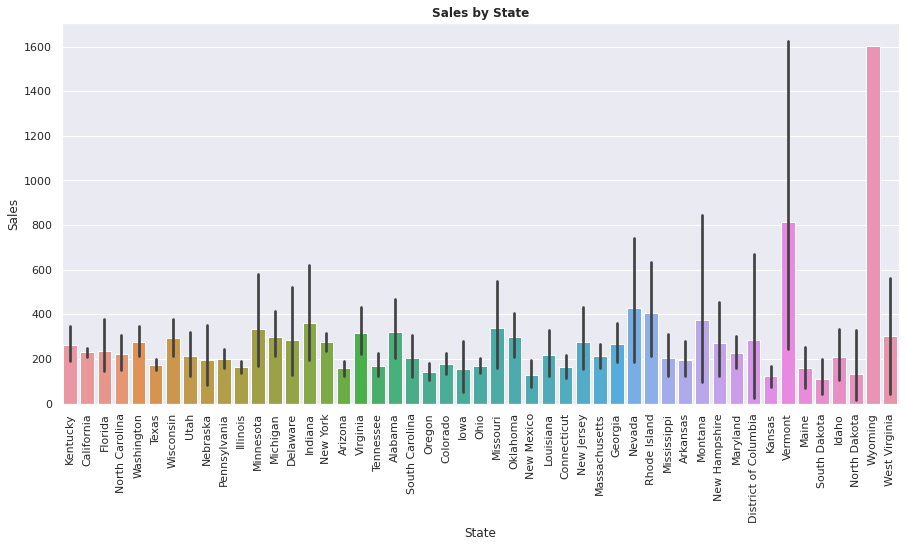

In [22]:
plt.figure(figsize = (15, 7))

sns.barplot(data=df, x="State", y="Sales")
plt.title('Sales by State', fontsize=12, weight="bold")
plt.xticks(rotation = 90)
plt.show()

In matter of sales, Wyoming and Vemont States make the most sales in the dataset. Kansas, South & North Dakota make the least sales.

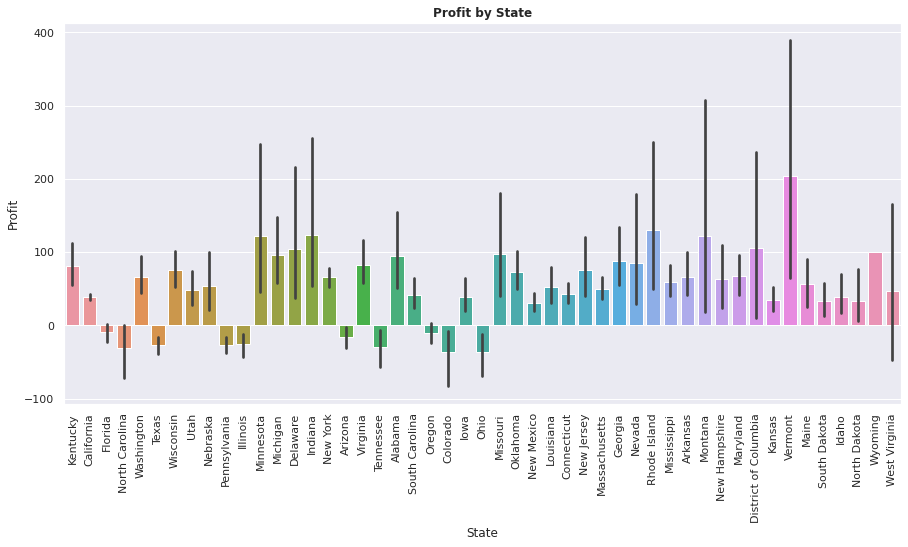

In [23]:
plt.figure(figsize = (15, 7))

sns.barplot(data=df, x="State", y="Profit")
plt.title('Profit by State', fontsize=12, weight="bold")
plt.xticks(rotation = 90)
plt.show()

In matter of profit, Vermont makes the highest profit, but North California, Colorado and Ohio make the worst loss in profit, there are other states with loss in profit as we see in the figure.

Text(0.5, 1.0, 'Profit by Region')

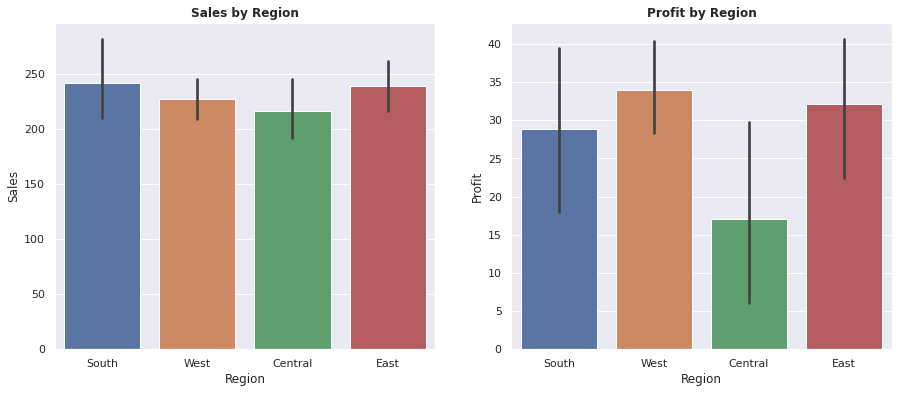

In [24]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
sns.barplot(data=df, x="Region", y="Sales")
plt.title('Sales by Region', fontsize=12, weight="bold")

plt.subplot(1,2,2)
sns.barplot(data=df, x="Region", y="Profit")
plt.title('Profit by Region', fontsize=12, weight="bold")

In terms of Region, the Central Region makes the least profit, the West and the East take the best profit, in terms of sales the South and the East make the highest sales.

Text(0.5, 1.0, 'Profit by Category')

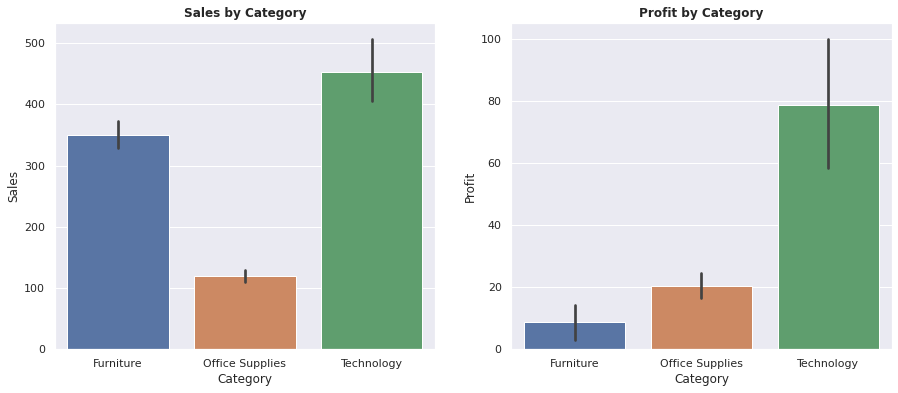

In [25]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
sns.barplot(data=df, x="Category", y="Sales")
plt.title('Sales by Category', fontsize=12, weight="bold")

plt.subplot(1,2,2)
sns.barplot(data=df, x="Category", y="Profit")
plt.title('Profit by Category', fontsize=12, weight="bold")

In terms of profit the Technology Category is the best it makes the most of the profit and the Furniture make the least profit, in terms of sales the technology and the Furniture categories make the best sales and the Office Supples make the least sales. 

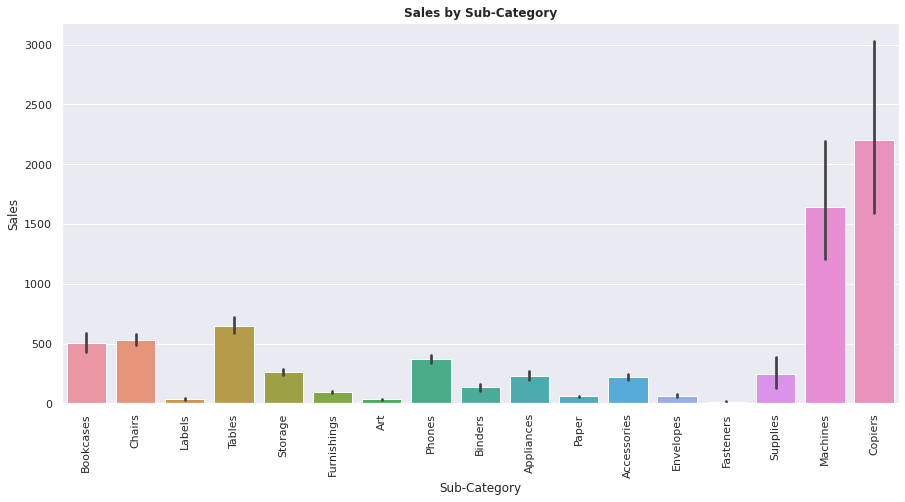

In [26]:
plt.figure(figsize = (15, 7))

sns.barplot(data=df, x="Sub-Category", y="Sales")
plt.title('Sales by Sub-Category', fontsize=12, weight="bold")
plt.xticks(rotation = 90)
plt.show()

In terms of sales, Copiers & Machines Sub-Categories makes the best sales. However, Fasteners, Art, are bad in sales.

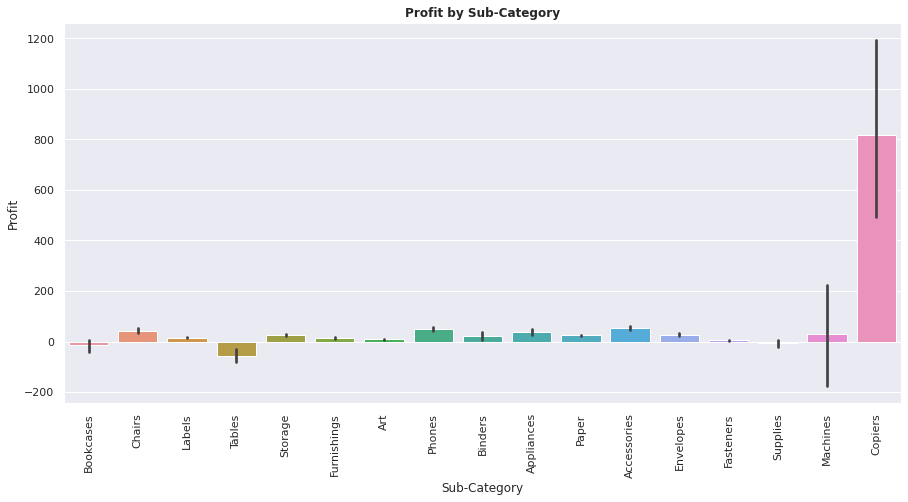

In [27]:
plt.figure(figsize = (15, 7))

sns.barplot(data=df, x="Sub-Category", y="Profit")
plt.title('Profit by Sub-Category', fontsize=12, weight="bold")
plt.xticks(rotation = 90)
plt.show()

In terms of profit, The Copiers are the best in profit. However, we observe a loss in profit for Tables, no profit in Art, Fasteners Bookcases and other Sub-Categories as we see from the figure.

#### Multivariate Data Exploration:
In this part we'll perform multivariate visualizations to describe the features of our dataset. First let's check the profitable category for each region.

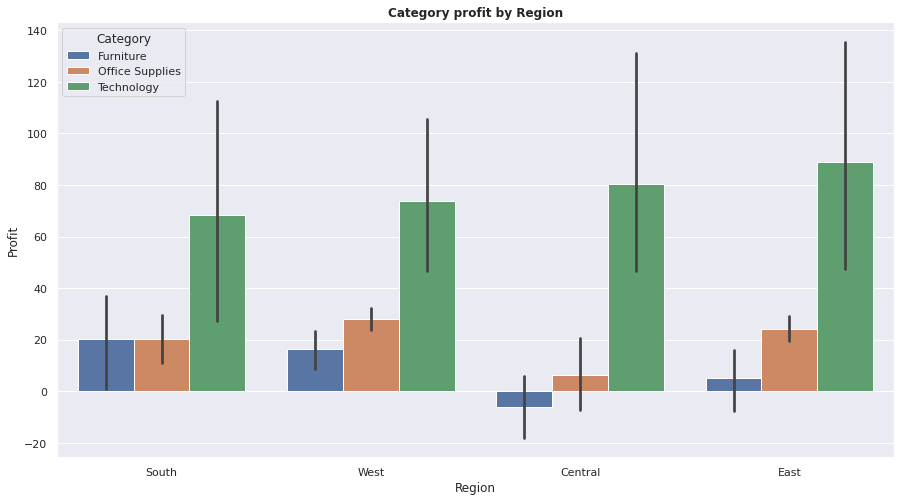

In [28]:
plt.figure(figsize = (15, 8))

sns.barplot(data=df, x="Region", y="Profit", hue='Category')
plt.title('Category profit by Region', fontsize=12, weight="bold")
plt.show()

As we see Technology category is the most profitable for all the regions, the East and the Central regions make the best profit for this category. However the Central Region makes loss in profit for the Furniture category and less profit for the Office supplies category than the other regions, the South & West Regions make profit from Furniture and Office Supplies categories.

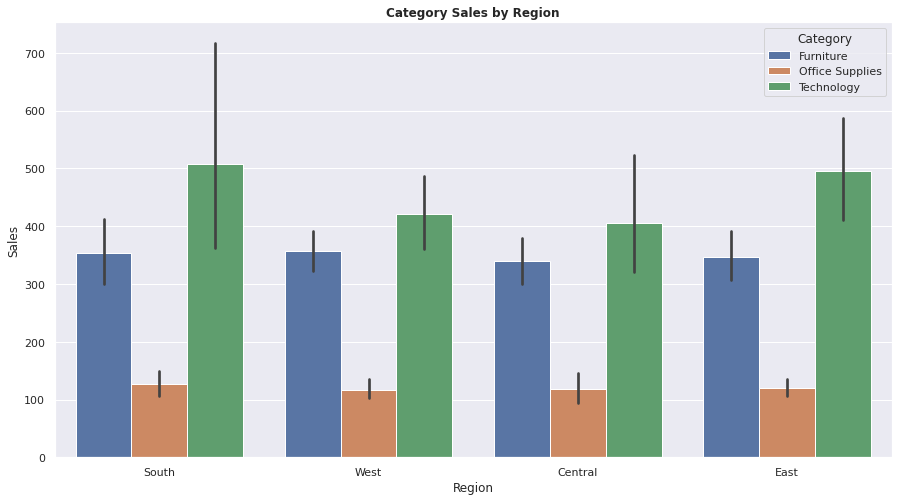

In [29]:
plt.figure(figsize = (15, 8))

sns.barplot(data=df, x="Region", y="Sales", hue='Category')
plt.title('Category Sales by Region', fontsize=12, weight="bold")
plt.show()

In terms of sales, South & East Regions make the most sales from Technology Category, the sales of the other categories are equal for all region. 

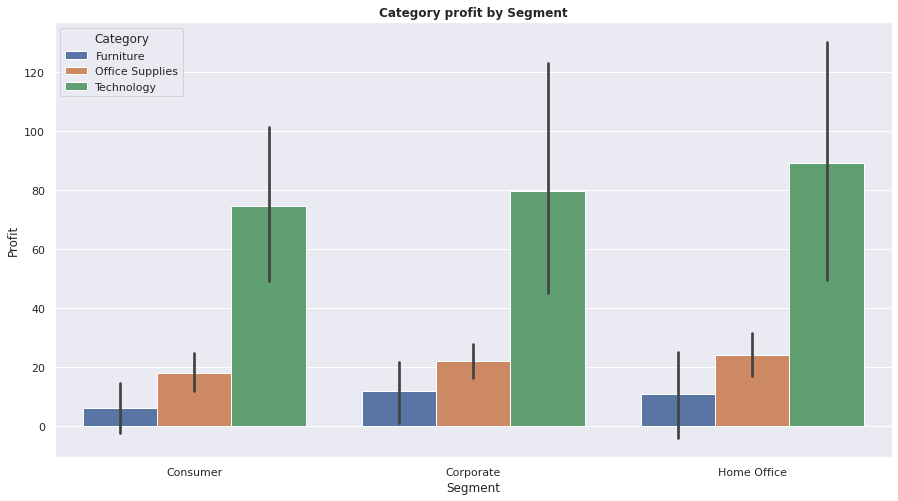

In [30]:
plt.figure(figsize = (15, 8))

sns.barplot(data=df, x="Segment", y="Profit", hue='Category')
plt.title('Category profit by Segment', fontsize=12, weight="bold")
plt.show()

Tecnology category makes the best profit for all the segements, Furniture is the less profitable category, and the best segement is profit is th Home office.

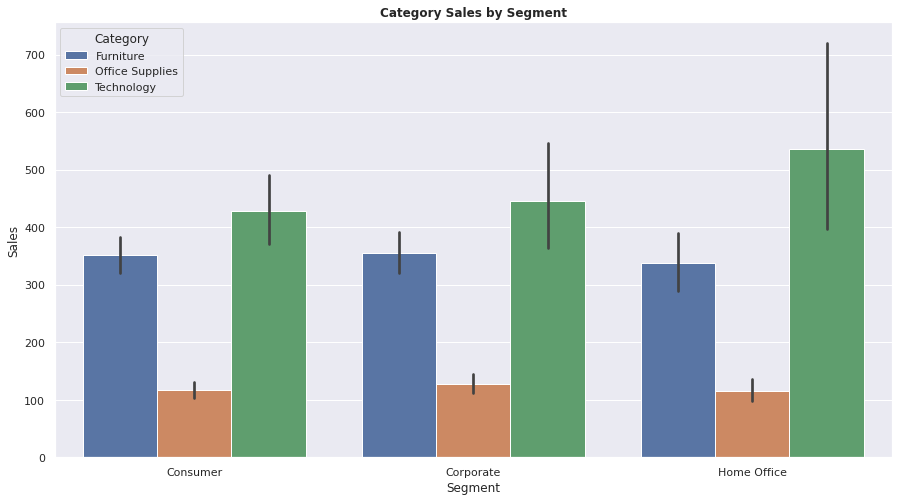

In [31]:
plt.figure(figsize = (15, 8))

sns.barplot(data=df, x="Segment", y="Sales", hue='Category')
plt.title('Category Sales by Segment', fontsize=12, weight="bold")
plt.show()

Technology and Furniture categories make the best sales for all the segements, the Office category saless are the less, and the Home Office segement is the best segement is sales.

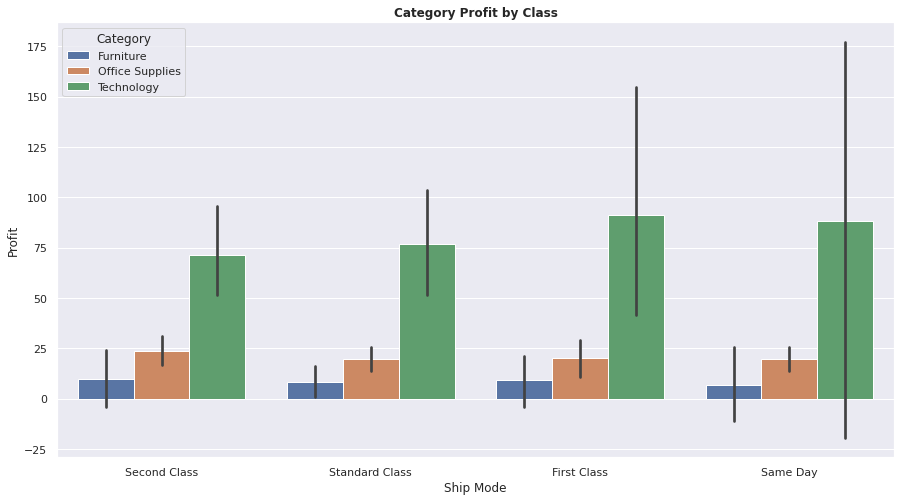

In [32]:
plt.figure(figsize = (15, 8))

sns.barplot(data=df, x="Ship Mode", y="Profit", hue='Category')
plt.title('Category Profit by Class', fontsize=12, weight="bold")
plt.show()

There is no huge difference between the classes, all th classes make profit for each category, as always the echnology category make the best profit and the Furniture make the less profit.

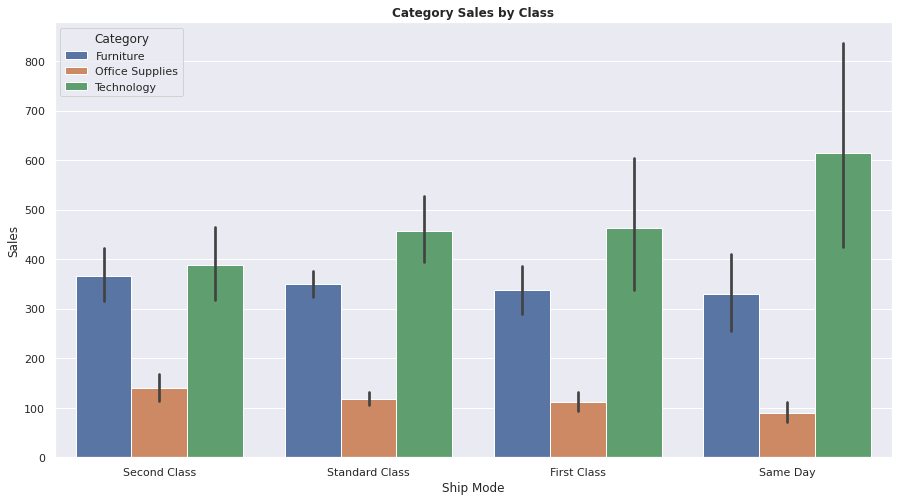

In [33]:
plt.figure(figsize = (15, 8))

sns.barplot(data=df, x="Ship Mode", y="Sales", hue='Category')
plt.title('Category Sales by Class', fontsize=12, weight="bold")
plt.show()

The same thing for sales, the Same Day class make the best sales from the Technology category than the other classes.

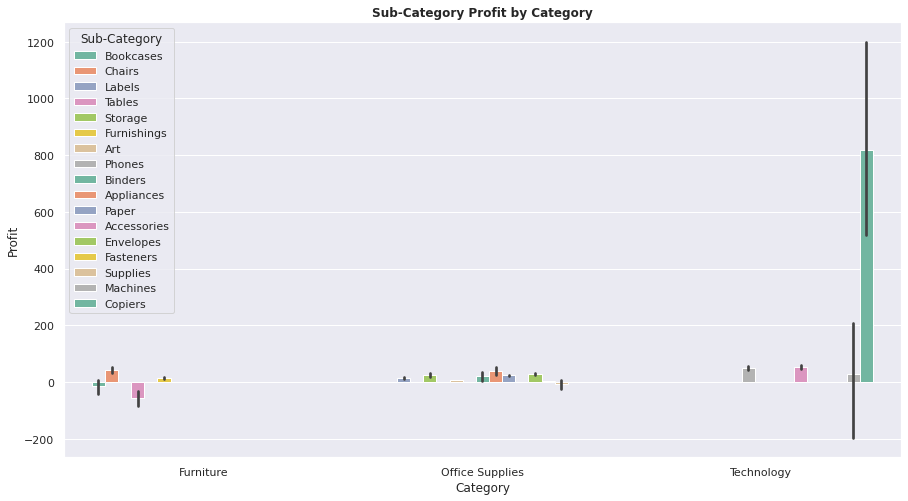

In [34]:
plt.figure(figsize = (15, 8))

sns.barplot(data=df, x="Category", y="Profit", hue='Sub-Category', palette="Set2")
plt.title('Sub-Category Profit by Category', fontsize=12, weight="bold")
plt.show()

As we see from the figure, the Copiers Sub-Category make the most profit in the Technology category, Machines can make loses for the category, Tables and Bookcases make loses in profit for the Furniture category.

In [10]:
df['Sub-Category'].unique()
order = ['Bookcases', 'Chairs', 'Tables','Furnishings', 'Labels', 'Storage',
     'Art', 'Binders', 'Appliances', 'Paper',
        'Envelopes', 'Fasteners', 'Supplies','Accessories', 'Phones', 'Machines',
       'Copiers']

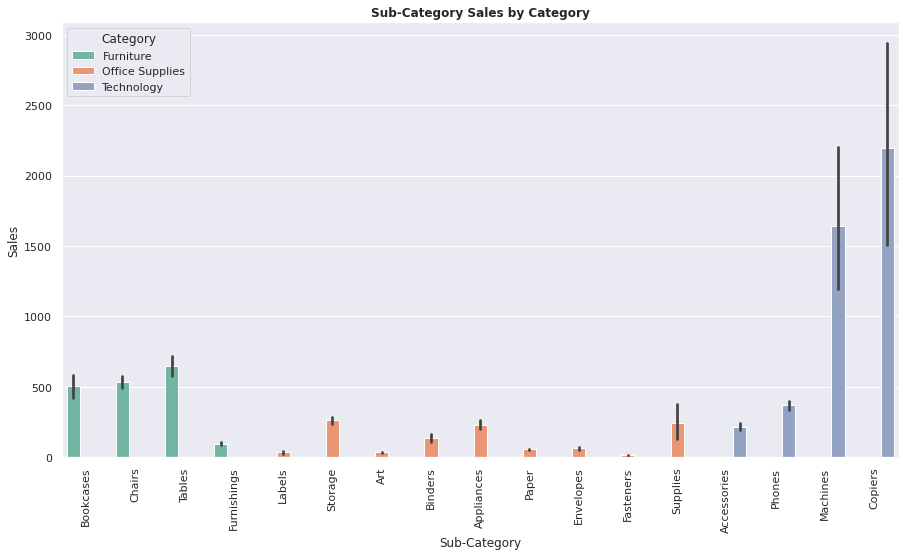

In [11]:
plt.figure(figsize = (15, 8))

sns.barplot(data=df, x="Sub-Category", y="Sales", hue='Category', order=order,  palette="Set2")
plt.title('Sub-Category Sales by Category', fontsize=12, weight="bold")
plt.xticks(rotation = 90)

plt.show()

For the Furniture category:
* Bookcases, Chairs, Tables make the good sales.
* Furnishings are bad is sales.

For the Office supplies category:
* Storage, Supplies, Appliances and Blinders make the good sales.
* Labels, Art, Fasteners bad is sales.

For the Technology category:
* Machine and Copiers make the best sales.
* Phones and Accessories sales are less than the 1st two.

in general Technology category makes the best sales.

/tmp/ipykernel_1369/3654839832.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("State")['Sales','Profit'].sum().sort_values(by='Profit', ascending=False).plot(kind='bar',


<AxesSubplot:title={'center':'The Sum of Sales & Profit by State'}, xlabel='State'>

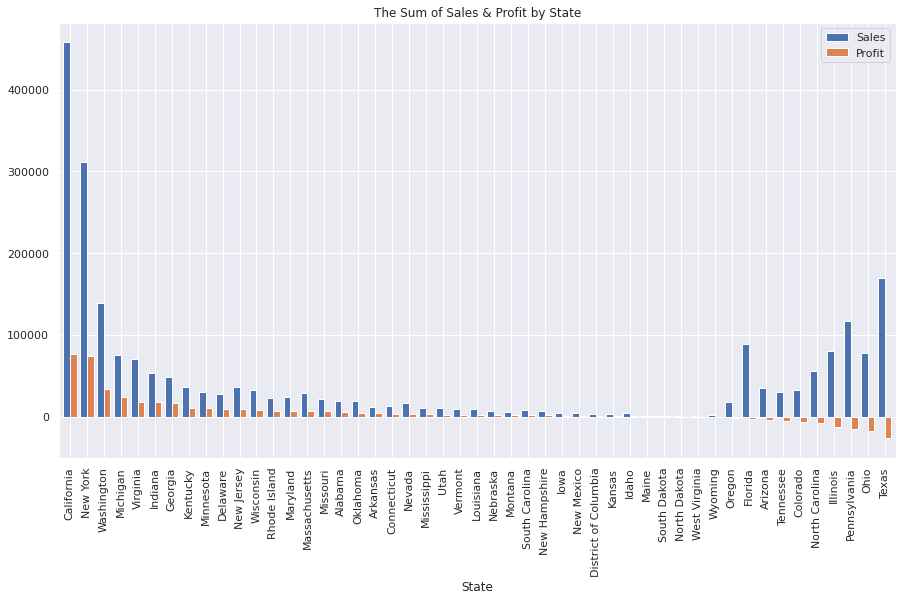

In [38]:
df.groupby("State")['Sales','Profit'].sum().sort_values(by='Profit', ascending=False).plot(kind='bar',
                title='The Sum of Sales & Profit by State', width=0.8, figsize=(15,8))

In terms of sum:
- The best States in sales: California, NY,Texas, Washington and Pennsylvania.
- The best States in profit: California, NY, Washington and Michigan.


- The worst states in sales: West virginia, North & South Dakota, Maine, Idaho, Kansas..., note that they make no sales & no profit.
- The worst states in profit: Texas, Ohio, Pennsylvania and illinois, they have loss in profit.

/tmp/ipykernel_1369/525011227.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("State")['Sales','Profit'].mean().sort_values(by='Profit', ascending=False).plot(kind='bar',


<AxesSubplot:title={'center':'The Mean Sales & Profit by State'}, xlabel='State'>

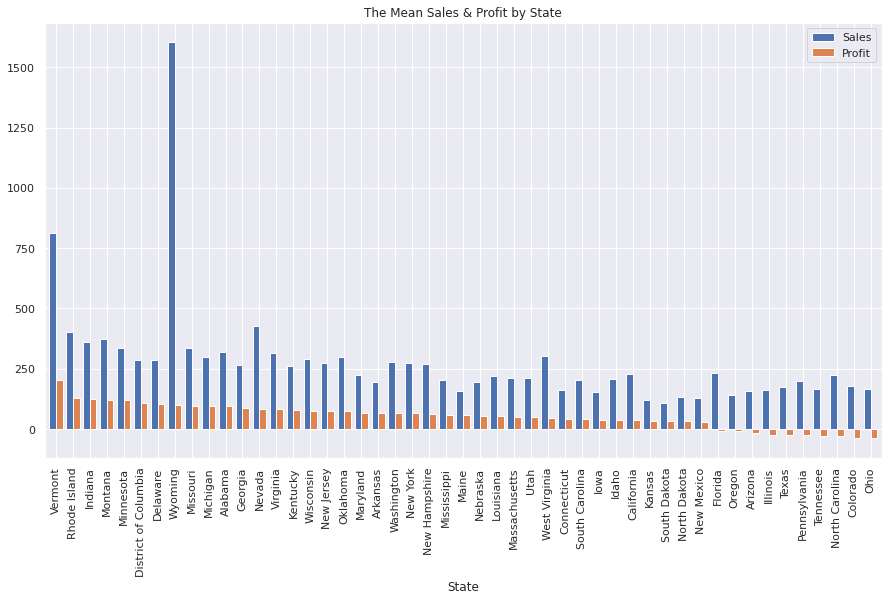

In [39]:
df.groupby("State")['Sales','Profit'].mean().sort_values(by='Profit', ascending=False).plot(kind='bar',
                title='The Mean Sales & Profit by State', width=0.8, figsize=(15,8))

In terms of mean:
- The best States in sales: Wyoming, Vemont,Nevada and Rhode island.
- The best States in profit: Vemont, Rhode island, Indiana and Montana.


- The worst states in sales: North & South Dakota, Kansas and New Mexico, but they make some profit.
- The worst states in profit: Ohio, Colorado, Noth Carolina and Tennesse, they have some loss in profit.

**Why there is a difference between the mean and the sum?**
It depends on the data that exist the most in the dataset, as we see the most rows of our data are from California, New York and Washington.

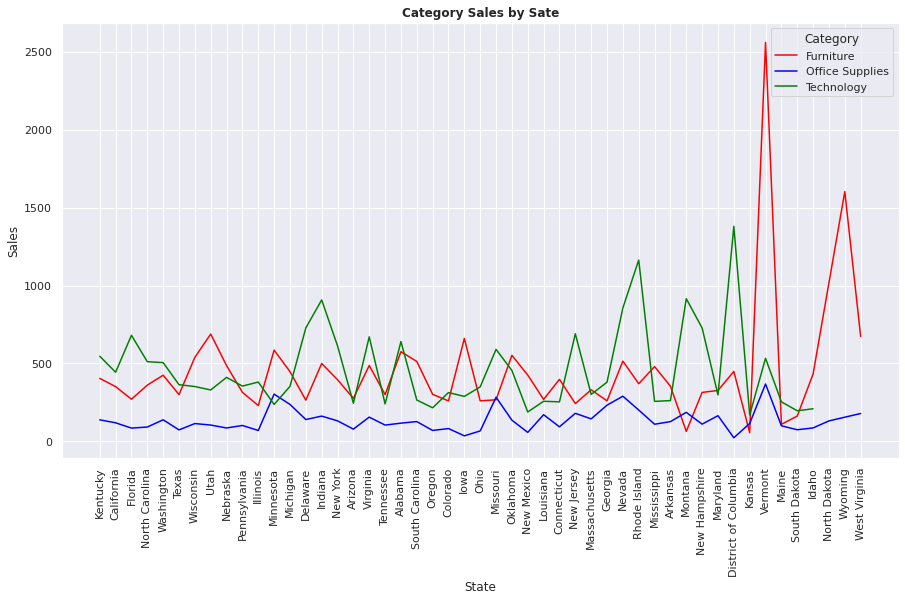

In [40]:
plt.figure(figsize = (15, 8))

sns.lineplot(data=df, x="State", y="Sales", hue='Category',  ci=None, palette = ['red','blue','green'])
plt.title('Category Sales by Sate', fontsize=12, weight="bold")
plt.xticks(rotation = 90)

plt.show()

- States with the best Furniture sales: Vemont, Wyoming Noth Dakota and West Virginia.
- States with the best Office supplies sales: Vemont, Missouri, Nevada and Minnesota.
- States with the best Technology sales: District of Columbia, Rhode Island, Indiana and Montana.


- States with the worst Furniture sales: Kansas, Montana, Maine, South Dakota.
- States with the worst Office supplies sales: District of Columbia, Lowa, New Mexico and illinois.
- States with the worst Technology sales: West virginia, North & South Dakota, Wyoming, Idaho, Kansas.


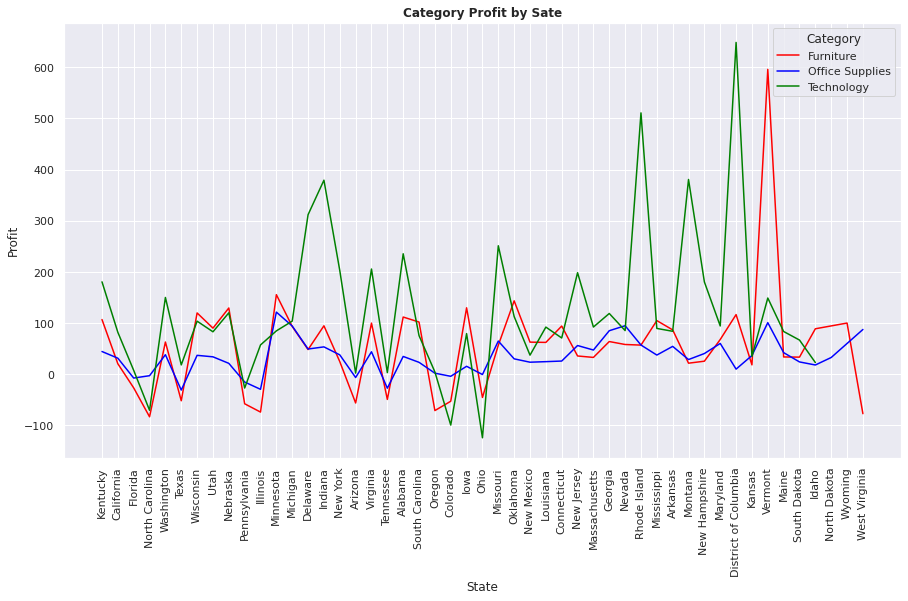

In [58]:
plt.figure(figsize = (15, 8))

sns.lineplot(data=df, x="State", y="Profit", hue='Category',  ci=None, palette = ['red','blue','green'])
plt.title('Category Profit by Sate', fontsize=12, weight="bold")
plt.xticks(rotation = 90)

plt.show()

- States with the best Furniture Profit: Vemont, Oklahoma, Lowa and Minnesota.
- States with the best Office supplies Profit: Minnesota, Vemont and Nevada.
- States with the best Technology Profit: District of Columbia, Rhode Island, Indiana and Montana.


- States with the worst Furniture sales: West virginia, North Carolina, Ilinois, Oregon.
- States with the worst Office supplies sales: Texas, Ilinois and Tennesse.
- States with the worst Technology sales: Ohio, Colorado, and North Carolina.


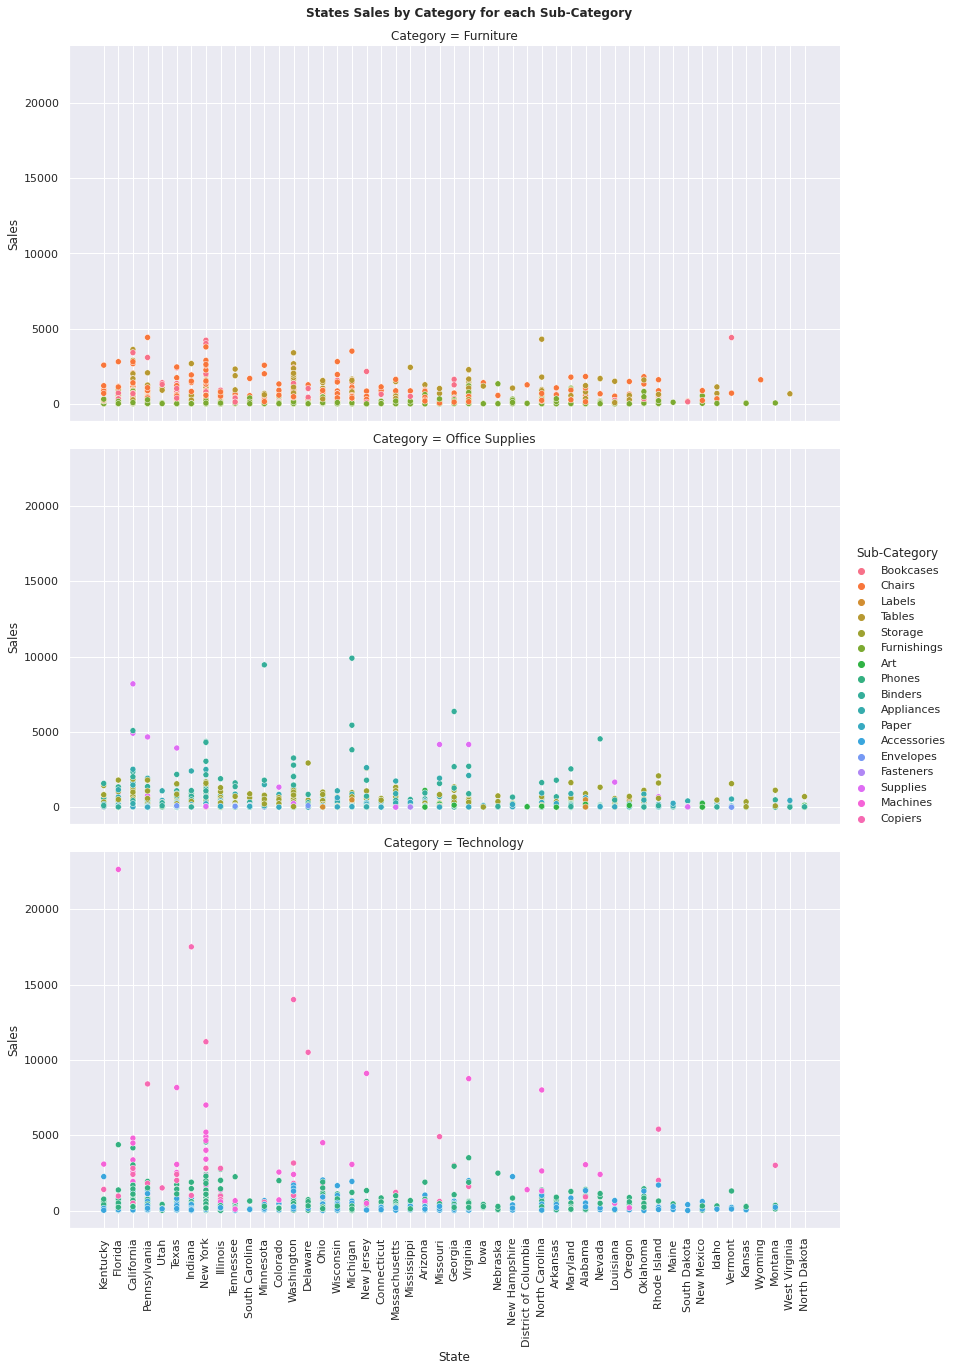

In [100]:
sns.set(rc={'figure.figsize':(15,8)})

rel = sns.relplot(data = df, x = "State", y = "Sales", hue = "Sub-Category", row='Category', height=6, aspect=2)
rel.fig.suptitle('States Sales by Category for each Sub-Category', fontsize=12, weight="bold")
rel.fig.subplots_adjust(top=.95)
plt.xticks(rotation = 90)

plt.show()

This is other plot that describes the sales by categor and sub category. 

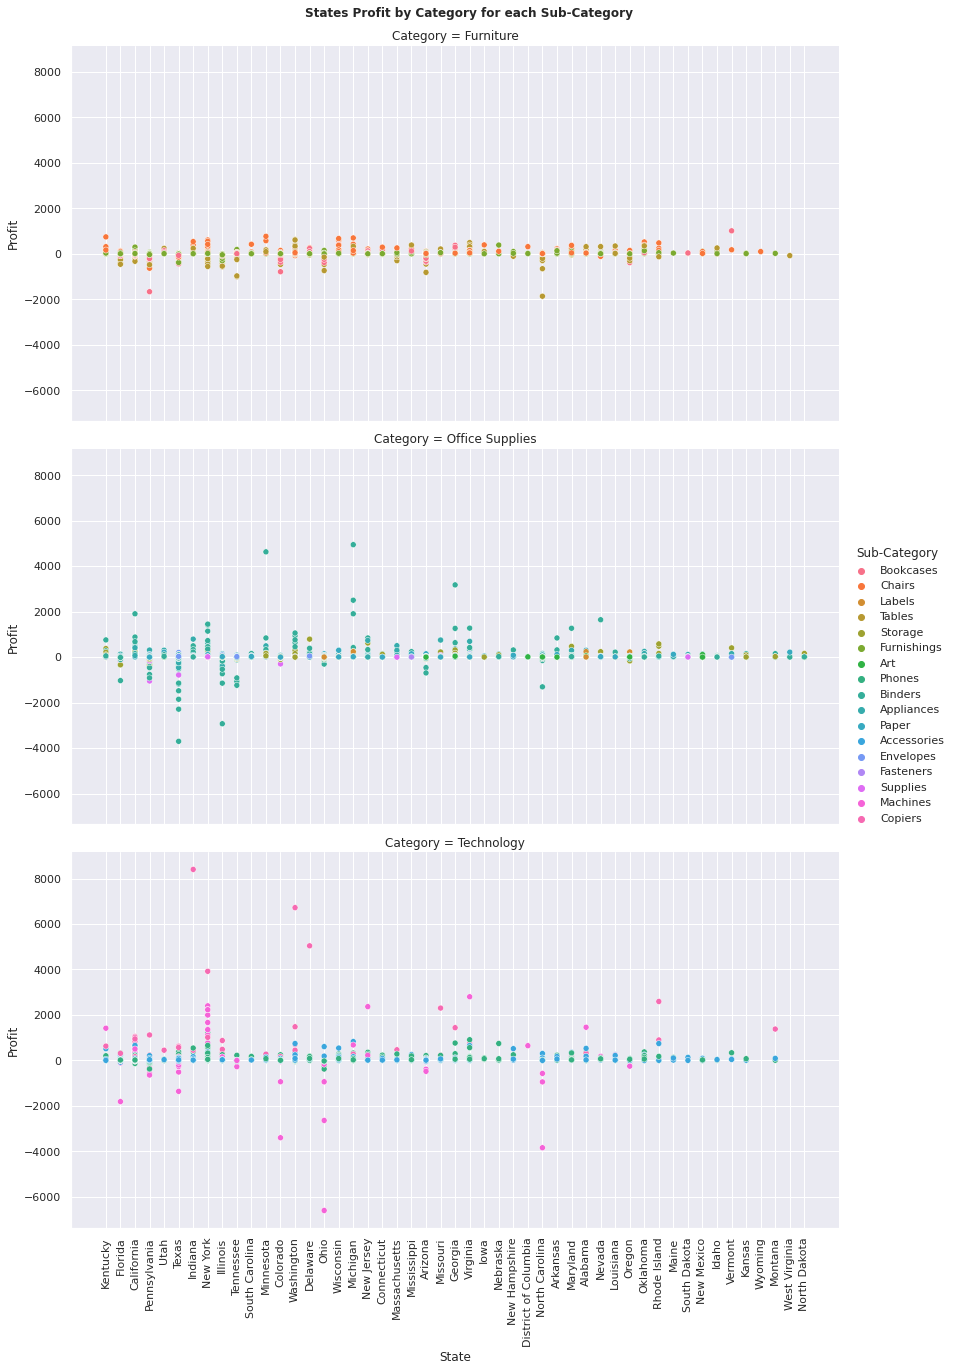

In [13]:
sns.set(rc={'figure.figsize':(15,8)})

rel = sns.relplot(data = df, x = "State", y = "Profit", hue = "Sub-Category", row='Category', height=6, aspect=2)
rel.fig.suptitle('States Profit by Category for each Sub-Category', fontsize=12, weight="bold")
rel.fig.subplots_adjust(top=.95)
plt.xticks(rotation = 90)

plt.show()

This is other plot that describes the states' profit by category and sub category. 

### Conclusion:
We'll draw conclusion for our 3 Exploratory parts.

#### Univariate Analysis:
* Sales, profit and Quantity are right skewed, se we have many small values and outliers in the data.
* The most Discount rates exist in the data are 0% and 20%
* Standar class and Customer segment are the most common rows in the dataset.
* California, New York, and Texas are the most common rows in the dataset.
* Wyoming, West Virginia, North Dakota and some other states are rarely exists in the dataset compared to common ones.
* West and East are the most common Regions.
* Office supplies are the most common category, and Blinders, Paper, Furnishiings and Phones are the most Sub-Categories exist in the dataset.

#### Bivariate Analysis:
* Medium positive correlation between Profit & Sales, and weak negative correlation between Profit & Discount. 
* More Quantity means more Sales especially in the Quantity between 11 to 13, and the same thing for the profit.
* The Discount of 50% can make more sales but less or loss in profit, the optimum discount for good sales and  profit is between 0% and 15%.
* Classes are close in profit and sales, Home office segement is the best in profit and sales.
* Wyoming and Vemont States make the most sales in the dataset. Kansas, South & North Dakota make the least sales.
* Vermont makes the highest profit, but North California, Colorado and Ohio make the worst loss in profit.
* Central Region makes the least profit, the West and the East take the best profit, but they are close in sales.
* Technology Category is the best it makes the most of the profit and the Furniture make the least profit, in terms of sales the technology and the Furniture categories make the best sales and the Office Supples make the least sales.
* Copiers & Machines Sub-Categories makes the best sales. However, Fasteners, Art, are bad in sales. 
* The Copiers are the best in profit. However, we observe a loss in profit for Tables, no big profit for Art, Fasteners and Bookcases.

#### Multivariate Analysis:
* Technology category is the most profitable for all the regions, the East and the Central regions make the best profit for this category. However the Central Region makes loss in profit for the Furniture category and the least profit for the Office supplies category than the other regions, the South & West Regions make profit from Furniture and Office Supplies categories.
* South & East Regions make the most sales from Technology Category, the sales of the other categories are equal for all regions.
* Tecnology category makes the best profit for all the segements, Furniture is the less profitable category and the least for the customer segement, and the best segement in profit is the Home office.
* Same Day class make the best sales from the Technology category than the other classes.
* Copiers Sub-Category make the most profit in the Technology category, Machines can make profit and loses (depends on dicount), Tables and Bookcases make loses in profit for the Furniture category.

For the Furniture category:
* Bookcases, Chairs, Tables make the good sales.
* Furnishings are bad is sales.

For the Office supplies category:
* Storage, Supplies, Appliances and Blinders make the good sales.
* Labels, Art, Fasteners bad is sales.

For the Technology category:
* Machine and Copiers make the best sales.
* Phones and Accessories sales are less than the 1st two.

in general Technology category makes the best sales.


In terms of sum:
- The best States in sales: California, NY,Texas, Washington and Pennsylvania.
- The best States in profit: California, NY, Washington and Michigan.


- The worst states in sales: West virginia, North & South Dakota, Maine, Idaho, Kansas..., note that they make no sales & no profit.
- The worst states in profit: Texas, Ohio, Pennsylvania and illinois, they have loss in profit.

In terms of mean:
- The best States in sales: Wyoming, Vemont,Nevada and Rhode island.
- The best States in profit: Vemont, Rhode island, Indiana and Montana.


- The worst states in sales: North & South Dakota, Kansas and New Mexico, but they make some profit.
- The worst states in profit: Ohio, Colorado, Noth Carolina and Tennesse, they have some loss in profit.

#### Sales:
- States with the best Furniture sales: Vemont, Wyoming Noth Dakota and West Virginia.
- States with the best Office supplies sales: Vemont, Missouri, Nevada and Minnesota.
- States with the best Technology sales: District of Columbia, Rhode Island, Indiana and Montana.


- States with the worst Furniture sales: Kansas, Montana, Maine, South Dakota.
- States with the worst Office supplies sales: District of Columbia, Lowa, New Mexico and illinois.
- States with the worst Technology sales: West virginia, North & South Dakota, Wyoming, Idaho, Kansas.

#### Profit:
- States with the best Furniture Profit: Vemont, Oklahoma, Lowa and Minnesota.
- States with the best Office supplies Profit: Minnesota, Vemont and Nevada.
- States with the best Technology Profit: District of Columbia, Rhode Island, Indiana and Montana.


- States with the worst Furniture sales: West virginia, North Carolina, Ilinois, Oregon.
- States with the worst Office supplies sales: Texas, Ilinois and Tennesse.
- States with the worst Technology sales: Ohio, Colorado, and North Carolina.

### Recommondations: 
In order to make the sales more profitable and have more success we need to take in consideration few points:
- First the Discount, it seems good for sales but it's deadly for profit, the optimum discount for profit is between 0% and 20%, more discount will make loss in profit.
- For the states with good profit in Furniture, we should develop the Furniture category for those states by offering The popular goods such as Bookcases, Chairs and Tables.
- For the states with good profit in Office supplies, we should develop the Office supplies for those states by offering The popular goods such as Storage, Supplies, Appliances and Blinders.
- For the states with good profit in Technology, we should develop the Technology category for those states by offering The popular goods such as Machine, Copiers, Phones and Accessories.